# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from g_config import gcode
from w_config import wcode

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# This is just a test of variables to use in the dataframe

city_name = 'houston'
url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units=metric&appid={wcode}'
response = requests.get(url)
data_val = response.json()
pprint(data_val)

print(f"Latitude: {data_val['coord']['lat']}")
print(f"Longitude: {data_val['coord']['lon']}")
print(f"Max temp: {data_val['main']['temp_max']}")
print(f"Humidity: {data_val['main']['humidity']}")
print(f"Cloudiness: {data_val['clouds']['all']}")
print(f"Wind speed: {data_val['wind']['speed']}")
print(f"Country: {data_val['sys']['country']}")
print(f"Date: {data_val['dt']}")


{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 29.7633, 'lon': -95.3633},
 'dt': 1613256808,
 'id': 4699066,
 'main': {'feels_like': -0.61,
          'humidity': 75,
          'pressure': 1016,
          'temp': 4.85,
          'temp_max': 6,
          'temp_min': 3.89},
 'name': 'Houston',
 'sys': {'country': 'US',
         'id': 4850,
         'sunrise': 1613221358,
         'sunset': 1613261334,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 330, 'speed': 5.14}}
Latitude: 29.7633
Longitude: -95.3633
Max temp: 6
Humidity: 75
Cloudiness: 75
Wind speed: 5.14
Country: US
Date: 1613256808


In [4]:
print('Checking available cities')
print('----------------------------')
number = 0
city_n =[]
lat =[]
lon =[]
max_temp =[]
humidity =[]
cloudiness =[]
w_speed =[]
country =[]
date =[]

for city in cities:
    
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={wcode}'
    response = requests.get(url)
    data_val = response.json()
    
    if str(response) == '<Response [404]>':
        print(f'City not found. Skipping to next recording')
    else:
        number+=1
        print(f'Recording No. {number}: {city}') 
        city_n.append(city)
        lat.append(data_val['coord']['lat'])
        lon.append(data_val['coord']['lon'])
        max_temp.append(data_val['main']['temp_max'])
        humidity.append(data_val['main']['humidity'])
        cloudiness.append(data_val['clouds']['all'])
        w_speed.append(data_val['wind']['speed'])
        country.append(data_val['sys']['country'])
        date.append(data_val['dt'])

print('----------------------------')        
print('Data retrieval complete')
    

Checking available cities
----------------------------
City not found. Skipping to next recording
City not found. Skipping to next recording
Recording No. 1: barrow
Recording No. 2: ushuaia
Recording No. 3: nikolskoye
Recording No. 4: mataura
Recording No. 5: omsukchan
Recording No. 6: vryheid
Recording No. 7: lebu
Recording No. 8: punta arenas
Recording No. 9: cape town
Recording No. 10: hobart
Recording No. 11: khatanga
Recording No. 12: atuona
Recording No. 13: grigiskes
Recording No. 14: port elizabeth
Recording No. 15: ribeira grande
Recording No. 16: tevaitoa
Recording No. 17: saint-denis
Recording No. 18: mar del plata
Recording No. 19: swindon
Recording No. 20: cherskiy
City not found. Skipping to next recording
Recording No. 21: saint-philippe
Recording No. 22: mananara
Recording No. 23: damghan
Recording No. 24: provideniya
Recording No. 25: bredasdorp
Recording No. 26: ostrovnoy
Recording No. 27: ponta do sol
Recording No. 28: tasiilaq
Recording No. 29: east london
Recording

Recording No. 252: san patricio
Recording No. 253: nishihara
Recording No. 254: batagay-alyta
Recording No. 255: soe
City not found. Skipping to next recording
Recording No. 256: sobolevo
City not found. Skipping to next recording
Recording No. 257: san felipe
Recording No. 258: eyl
Recording No. 259: evensk
Recording No. 260: cayenne
Recording No. 261: chicama
Recording No. 262: aykhal
Recording No. 263: shasta lake
Recording No. 264: katsuura
Recording No. 265: monschau
Recording No. 266: muravlenko
Recording No. 267: dingle
Recording No. 268: toropets
Recording No. 269: bilibino
Recording No. 270: prattville
Recording No. 271: alta floresta
Recording No. 272: bantou
Recording No. 273: kodiak
Recording No. 274: barcelos
Recording No. 275: monte escobedo
Recording No. 276: san policarpo
Recording No. 277: wasco
City not found. Skipping to next recording
Recording No. 278: tazovskiy
City not found. Skipping to next recording
Recording No. 279: alem paraiba
Recording No. 280: mana
Recor

Recording No. 506: padang
Recording No. 507: sayyan
Recording No. 508: ilabaya
Recording No. 509: vinh
Recording No. 510: mantua
Recording No. 511: port lincoln
City not found. Skipping to next recording
Recording No. 512: port moresby
Recording No. 513: gela
Recording No. 514: pacifica
Recording No. 515: kirakira
Recording No. 516: kamen-na-obi
City not found. Skipping to next recording
Recording No. 517: sitka
Recording No. 518: gravdal
Recording No. 519: cam ranh
Recording No. 520: gordeyevka
Recording No. 521: tigil
Recording No. 522: cerasu
Recording No. 523: muscat
Recording No. 524: serenje
Recording No. 525: nhulunbuy
Recording No. 526: yar-sale
Recording No. 527: ucluelet
Recording No. 528: henties bay
Recording No. 529: nuuk
Recording No. 530: pinawa
Recording No. 531: turayf
Recording No. 532: necochea
Recording No. 533: champerico
Recording No. 534: portobelo
----------------------------
Data retrieval complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
df_cities = pd.DataFrame({'City':city_n, 'Latitude':lat, 'Longitude':lon,
                          'Max temp':max_temp, 'Humidity':humidity, 'Cloudiness':cloudiness, 
                          'Wind speed':w_speed, 'Country':country, 'Date':date})
display(df_cities.head())

,City,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,barrow,71.2906,-156.7887,-22.00,77,90,6.17,US,1613256569
1,ushuaia,-54.8000,-68.3000,7.00,81,75,0.89,AR,1613256576
2,nikolskoye,59.7035,30.7861,-8.00,93,75,2.00,RU,1613256610
3,mataura,-46.1927,168.8643,19.44,64,100,3.13,NZ,1613256572
4,omsukchan,62.5333,155.8000,-31.57,83,84,1.95,RU,1613256625


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [48]:
df_cities.describe() # No cities with humidity >100%

,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind speed,Date
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02
mean,19.949618,19.406789,9.348371,74.462547,56.011236,3.598483,1.613257e+09
std,34.034474,90.689533,17.960983,18.785286,39.171148,2.629903,2.504348e+02
min,-54.800000,-175.200000,-39.430000,1.000000,0.000000,0.050000,1.613256e+09
25%,-9.098650,-63.738400,-3.330000,65.000000,17.250000,1.652500,1.613257e+09
50%,23.273600,23.941700,16.000000,80.000000,75.000000,3.090000,1.613257e+09
75%,50.230850,95.926925,24.220000,88.000000,92.000000,4.755000,1.613257e+09
max,78.218600,179.316700,32.000000,100.000000,100.000000,15.950000,1.613257e+09


In [49]:
#  Get the indices of cities that have humidity over 100%.


In [50]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [66]:
df_cities.head()

,City,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,barrow,71.2906,-156.7887,-22.00,77,90,6.17,US,1613256569
1,ushuaia,-54.8000,-68.3000,7.00,81,75,0.89,AR,1613256576
2,nikolskoye,59.7035,30.7861,-8.00,93,75,2.00,RU,1613256610
3,mataura,-46.1927,168.8643,19.44,64,100,3.13,NZ,1613256572
4,omsukchan,62.5333,155.8000,-31.57,83,84,1.95,RU,1613256625


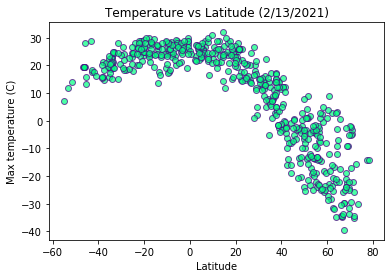

In [67]:
x_values = df_cities['Latitude']
y_values = df_cities['Max temp']
plt.scatter(x_values, y_values, color='springgreen', alpha=0.70, edgecolors='indigo')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Temperature vs Latitude (2/13/2021)')
plt.show()

## Latitude vs. Humidity Plot

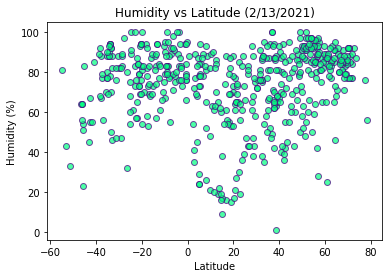

In [68]:
x_values = df_cities['Latitude']
y_values = df_cities['Humidity']
plt.scatter(x_values, y_values, color='springgreen', alpha=0.70, edgecolors='indigo')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude (2/13/2021)')
plt.show()

## Latitude vs. Cloudiness Plot

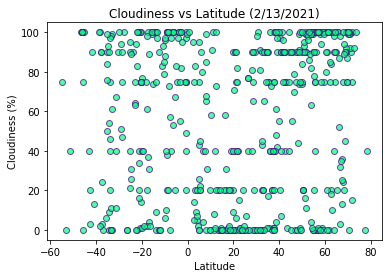

In [69]:
x_values = df_cities['Latitude']
y_values = df_cities['Cloudiness']
plt.scatter(x_values, y_values, color='springgreen', alpha=0.70, edgecolors='indigo')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude (2/13/2021)')
plt.show()

## Latitude vs. Wind Speed Plot

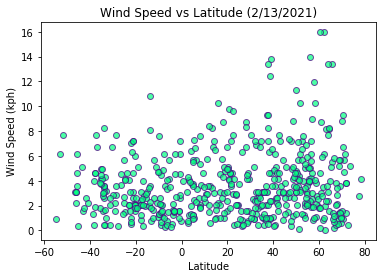

In [70]:
x_values = df_cities['Latitude']
y_values = df_cities['Wind speed']
plt.scatter(x_values, y_values, color='springgreen', alpha=0.70, edgecolors='indigo')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (kph)')
plt.title('Wind Speed vs Latitude (2/13/2021)')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [71]:
# Defyning data frame of North cities

north_cities = df_cities[df_cities['Latitude']>0]
north_cities.head()

,City,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,barrow,71.2906,-156.7887,-22.00,77,90,6.17,US,1613256569
2,nikolskoye,59.7035,30.7861,-8.00,93,75,2.00,RU,1613256610
4,omsukchan,62.5333,155.8000,-31.57,83,84,1.95,RU,1613256625
10,khatanga,71.9667,102.5000,-35.30,84,15,3.81,RU,1613256579
12,grigiskes,54.6833,25.0833,-3.33,93,90,3.09,LT,1613257148


The r value is -0.8835


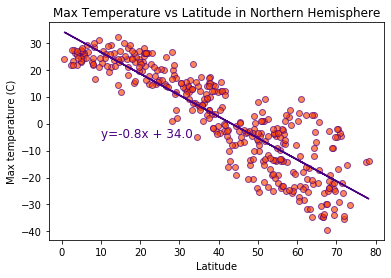

In [72]:
# Creating the regression

x_values = north_cities['Latitude']
y_values = north_cities['Max temp']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(10,-5),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Max Temperature vs Latitude in Northern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [73]:
south_cities = df_cities[df_cities['Latitude']<0]
south_cities.head()

,City,Latitude,Longitude,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
1,ushuaia,-54.8000,-68.3000,7.00,81,75,0.89,AR,1613256576
3,mataura,-46.1927,168.8643,19.44,64,100,3.13,NZ,1613256572
5,vryheid,-27.7695,30.7917,18.52,97,100,0.33,ZA,1613257163
6,lebu,-37.6167,-73.6500,14.65,77,3,7.67,CL,1613256589
7,punta arenas,-53.1500,-70.9167,12.00,43,0,6.17,CL,1613257164


The r value is 0.5679


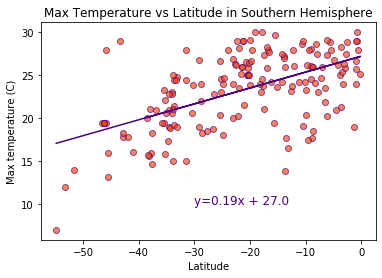

In [74]:
x_values = south_cities['Latitude']
y_values = south_cities['Max temp']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(-30,10),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Max Temperature vs Latitude in Southern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.3959


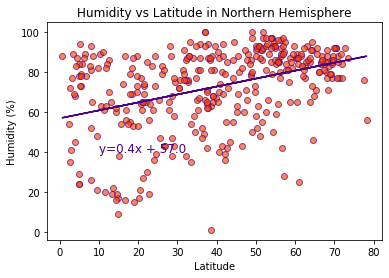

In [75]:
x_values = north_cities['Latitude']
y_values = north_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(10,40),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude in Northern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.345


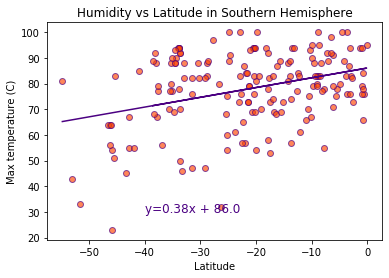

In [76]:
x_values = south_cities['Latitude']
y_values = south_cities['Humidity']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(-40,30),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Humidity vs Latitude in Southern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.3689


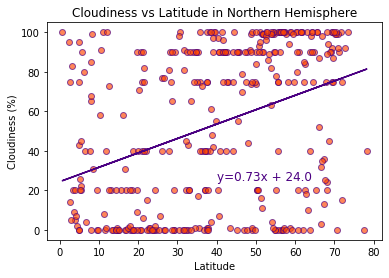

In [77]:
x_values = north_cities['Latitude']
y_values = north_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(40,25),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude in Northern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.1593


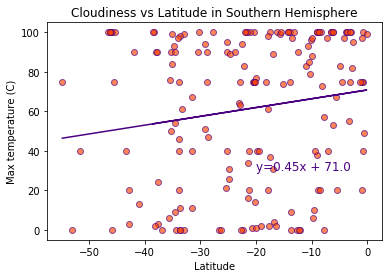

In [78]:
x_values = south_cities['Latitude']
y_values = south_cities['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(-20,30),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Cloudiness vs Latitude in Southern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is 0.0669


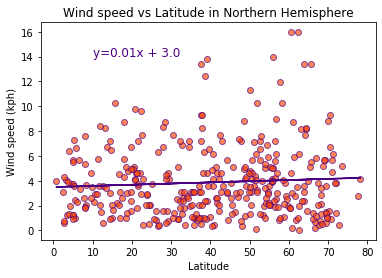

In [79]:
x_values = north_cities['Latitude']
y_values = north_cities['Wind speed']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(10,14),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Wind speed (kph)')
plt.title('Wind speed vs Latitude in Northern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is -0.1345


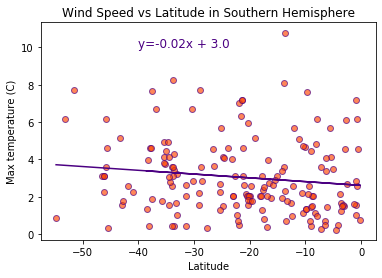

In [80]:
x_values = south_cities['Latitude']
y_values = south_cities['Wind speed']
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
line_eq = f'y={str(round(slope,2))}x + {str(round(intercept))}'
plt.scatter(x_values, y_values, color='orangered', alpha=0.65, edgecolors='indigo')
plt.plot(x_values, regress_values, "indigo")
plt.annotate(line_eq,(-40,10),fontsize=12,color="indigo")
plt.xlabel('Latitude')
plt.ylabel('Max temperature (C)')
plt.title('Wind Speed vs Latitude in Southern Hemisphere')
print(f'The r value is {round(rvalue,4)}')
plt.show()